# Alura Voz - Telecommunication Operator Company

This a Challenger we work on Alura Voz, a telecom operator company that needs helps from data analyst and scientist team to support sales team to build customer loyalty

## Context:
- In a initial meeting with company's sales team the importance of reducing the Customer Evasion Rate, known as Churn Rate. The Churn Rate indicates which and how many customers stop doing business with a company over a given period of time.
- In this file I'll focus on techniques of cleaning data and how to deal with them.
- In general, this dataset is a JSON file with many inconsistences, the idea of this file is to generated a clean csv file ready for an exploratory analysis.
- On Exploratory Analysis, we'll explore what causing evasion by relating variables and see which conclusions we are able to do based on data.

- Check out the original source if you are interested in using this data for other purposes on:
(https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

## Dataset Description:

We'll work on the data within Dados/Telco-Customer-Churn.json 

Each row corresponds to an individual customer at Telecom database.

The columns are:
- **customerID**: identification Number of each individual customer as kwown as Customer ID;
- **Churn**: to identify which customer stop doing business with the company;
- **gender**: gender (Male or Female);
- **SeniorCitizen**: to know which customer has an age above or equal to 65 years old;
- **Partner**: to identify which customer has a partner;
- **Dependents**: whether or not the customer has dependents;
- **tenure**: months of contract with a customer;
- **PhoneService**: phone subscription service;
- **MultipleLines**: multiple lines of phone subscription;
- **InternetService**: internet service provider subscription;
- **OnlineSecurity**: online security aditional subscription;
- **OnlineBackup**: online backup aditional subscription;
- **DeviceProtection**: device protection aditional subscription;
- **TechSupport**: tech support subscription to decrease waiting time;
- **StreamingTV**: streaming TV subscription;
- **StreamingMovies**: streaming movies subscription;
- **Contract**: contract type
- **PaperlessBilling**: if client prefer to receive his bills online; 
- **PaymentMethod**: payment method
- **Charges.Monthly**: total charges of all services per month;
- **Charges.Total**: total charges

## Objective: 
   - Examine/clean the dataset
   - Explore dataset distributions of single numerical and categorical features via statistics and plots
   - Explore relationships of multiple features via statistics and plots
   - Apply machine learning models and create metrics to evaluate ML performance

We are going to explore dataset to find answers for situation describe on context.

## 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_json('/content/Telco-Customer-Churn.json')

In [ ]:
data.head()

In [ ]:
data.shape

Let's take a look on which info are inside of each column to have an idea of what is going on

In [ ]:
data.customer[0]

In [ ]:
data.phone[0]

In [ ]:
data.internet[0]

In [ ]:
data.account[0]

By looking at the summary of the first row of column, we noticed that columns **"customer'**, **'phone'**, **'internet'** and **'account'** are dictionaries and there many information in a single cell, that difficult our analytics work, so let's breakdown each cell into a new dataframe to do some analysis



In [ ]:
data_customer = pd.json_normalize(data.customer)
data_customer.head()

In [ ]:
data_phone = pd.json_normalize(data.phone)
data_phone.head()

In [ ]:
data_internet = pd.json_normalize(data.internet)
data_internet.head()

In [ ]:
data_account = pd.json_normalize(data.account, sep='') #notice that doc were removed from column title
data_account.head()

## 2. Join Dataframes and Understand Datatypes

Now we want to join all of these dataframe to a single one so we can move on with our analysis. But before we need adjust our original dataframe so we can join clean data.

In [ ]:
data = data.drop(['customer','phone','internet','account'], axis=1)

In [ ]:
df = pd.concat([data,data_customer, data_phone, data_internet, data_account], axis=1)

In [ ]:
df.head()

In [ ]:
df.columns

We noticed that customerID and gender aren't in the same format as the rest of columns name, so let's rename them.

In [ ]:
df = df.rename({'customerID':'CustomerID','gender':'Gender','tenure':'Tenure'}, axis=1)
data.columns

In [ ]:
df.dtypes

In [ ]:
quali = []
quanti = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        quali.append(i)
    else:
        quanti.append(i)

print('Quantitative Columns: ', quanti)
print('Qualitative Columns: ', quali)

###Data Types:
Noticed that on line above, SeniorCitizen are counted as Quantitative, that's because of "0" and "1", we'll clean this data.

*   Quantitative:
    Tenure, ChargesMonthly, ChargesTotal
*   Qualitative:
    All the rest
 

## 3. Data Cleaning

Let's continue, clean dataframe and solve possible inconsistences. First we'll summarize info on each columns

In [ ]:
database = df

In [ ]:
database.nunique()

In [ ]:
for columns in database.columns:
  print('------------------------------------------------------------')
  print(database[columns].value_counts().sort_index())

A few key things we notice:
*   Churn has a total of 224 empty cells, which means cell without "0", "NAN" or spaces
*   In SeniorCitizen, "0" means client is below 65 years old, 1 means equal or above 65, let's adjust to "Yes" and "No" so it looks like a categorical variable;
*  Tenure, "0" means new clients that didn't reach one month of contract
*  ChargesTotal has 11 null values, which is the same as tenure "0". That happens because ChargesTotal = (tenure * ChargesMonthly), so new customers has total charge =  0. Also, is necessary to adjust dtype to float because it's a monetary value.

Let's work on these topics.


In [ ]:
database['Churn'].value_counts()

There are 224 nulls churn values in a range of 7267, that's mean 3.08% of my dataset, so is insignificant enough to be deleted

In [ ]:
database[database['Churn'] == ''].index.value_counts()

30      1
75      1
4938    1
4946    1
4976    1
       ..
2989    1
3053    1
3060    1
3076    1
7247    1
Length: 224, dtype: int64

In [ ]:
database.iloc[30]

CustomerID                         0047-ZHDTW
Churn                                        
Gender                                 Female
SeniorCitizen                               0
Partner                                    No
Dependents                                 No
Tenure                                     11
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                           No
TechSupport                                No
StreamingTV                                No
StreamingMovies                            No
Contract                       Month-to-month
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
ChargesMonthly                           79.0
ChargesTotal                            929.3
Name: 30, dtype: object

In [ ]:
index = database[database['Churn'] == ''].index
database.drop(index, inplace = True)

In [ ]:
database['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Replacing boolean SeniorCitizen column to dictionary

In [ ]:
database['SeniorCitizen'] = database['SeniorCitizen'].replace({0:'No', 1:'Yes'})


In [ ]:
database['SeniorCitizen']

0        No
1        No
2        No
3       Yes
4       Yes
       ... 
7262     No
7263     No
7264     No
7265     No
7266     No
Name: SeniorCitizen, Length: 7043, dtype: object

Let's replace blank space at total charges columns by 0

In [ ]:
database[database['ChargesTotal'] == ' ']

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
975,1371-DWPAZ,No,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [ ]:
database.loc[database['ChargesTotal'] == ' ', 'ChargesTotal'] = '0'

In [ ]:
database['ChargesTotal'].value_counts().sort_index()

0         11
100.2      1
100.25     1
100.35     1
100.4      1
          ..
997.75     1
998.1      1
999.45     1
999.8      1
999.9      1
Name: ChargesTotal, Length: 6531, dtype: int64

In [ ]:
database['ChargesTotal'] = database['ChargesTotal'].astype('float64')

In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   Gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   Tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


### Creating Daily Charges and alocated it

To improve our analysis, we'll create a new column with daily charges, which will basically ChargesTotal/30 days. Also, I'll alocated this column to index 19, before monthly charges to make our dataset more clean

In [ ]:
database['ChargesDaily'] = round(database['ChargesMonthly']/30,2)

In [ ]:
ChargesDaily = database.pop('ChargesDaily')

In [ ]:
database.insert(19,'ChargesDaily', ChargesDaily)

In [ ]:
database.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


With our database cleaned, let's export and do an Exploratory Data Analysis

In [ ]:
database.to_csv('Alura_Voz_data_cleaned.csv', index=False)

## 4. Exploratory Analysis

Let's do some visual analysis of evasion rate (churn) using seaborn

Importing seaborn and matplotlib library

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Alura_Voz_data_cleaned.csv')

In [ ]:
df.columns

Index(['CustomerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'ChargesDaily', 'ChargesMonthly',
       'ChargesTotal'],
      dtype='object')

In [ ]:
df.head(3)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85


### Analysing Churn variable

In [ ]:
df['Churn'].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

In [ ]:
activated = (df['Churn'] == 'No').sum()
out = (df['Churn'] == 'Yes').sum()
percent_act = round(activated/len(df['Churn'])*100,2)
percent_out = round(out/len(df['Churn'])*100,2)
print(f'There are a total of {activated} activated clients'
      f' and a total of {out} leave the service')
print (f'to have an idea of the proportion, {percent_act}% are activated clients and {percent_out}% leave the service.')

There are a total of 5174 activated clients and a total of 1869 leave the service
to have an idea of the proportion, 73.46% are activated clients and 26.54% leave the service.


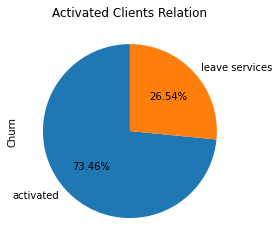

In [ ]:
plt.figure(figsize=(7,4))
df['Churn'].value_counts().plot(
    kind='pie', 
    autopct='%.2f%%', 
    labels = ['activated','leave services'],
    startangle=90).set_title('Activated Clients Relation').fontdict={'verticalaligment':'bottom'}

But how long customer are leaving the services?

[Text(0.5, 1.0, 'Tenure per Churn')]

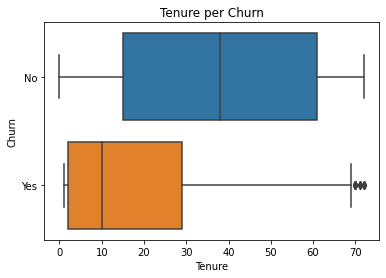

In [ ]:
sns.boxplot(data = df, x='Tenure', y='Churn').set(title='Tenure per Churn')

In [ ]:
plot = sns.displot(data=df, x='Tenure', col='Churn', hue='Churn')
x_ticks = np.arange(0, 75, 5)
plt.xticks(x_ticks)
plot

We can noticed that  more than a half of new customers leave the services before 5 months of services.

### Analyze Churn with other Variables

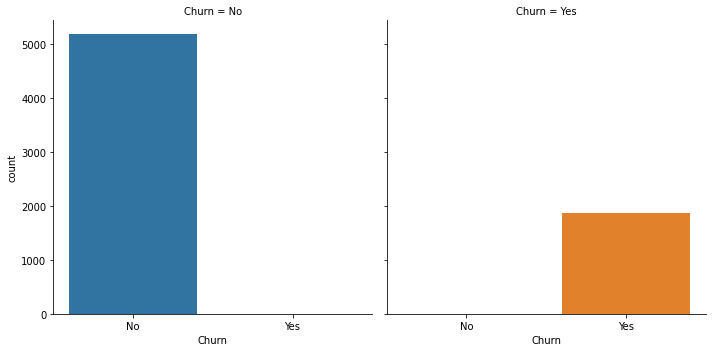

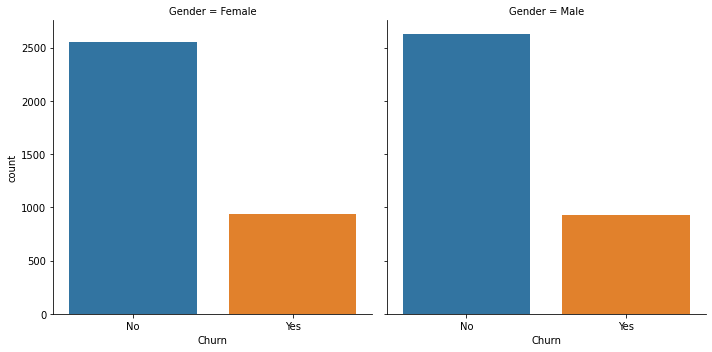

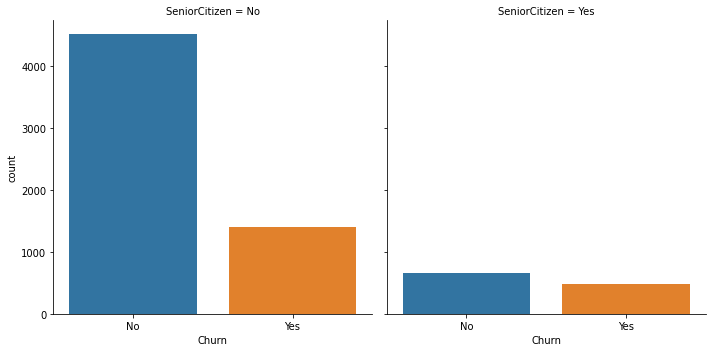

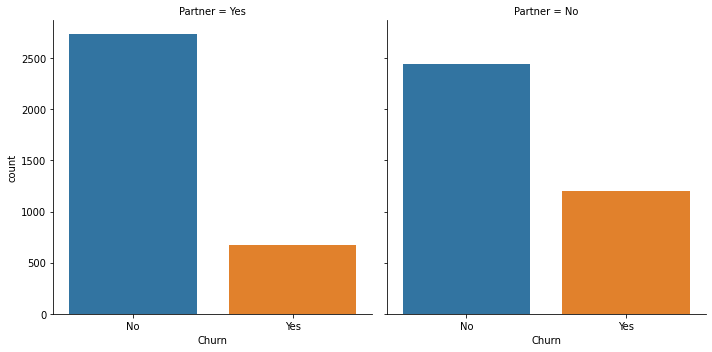

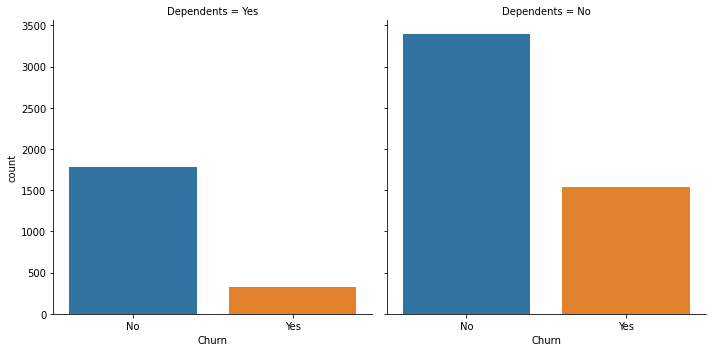

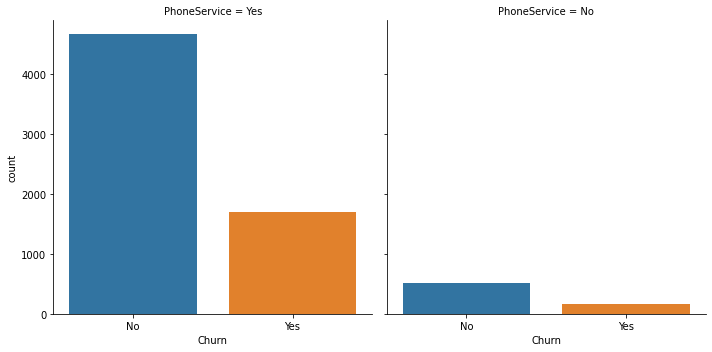

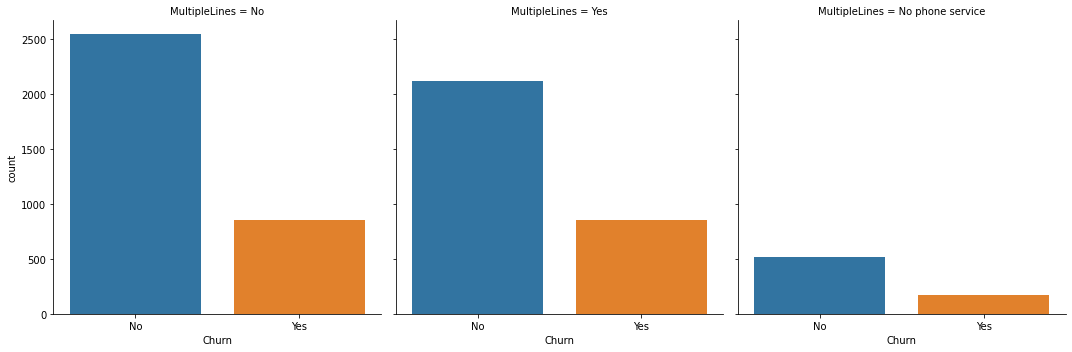

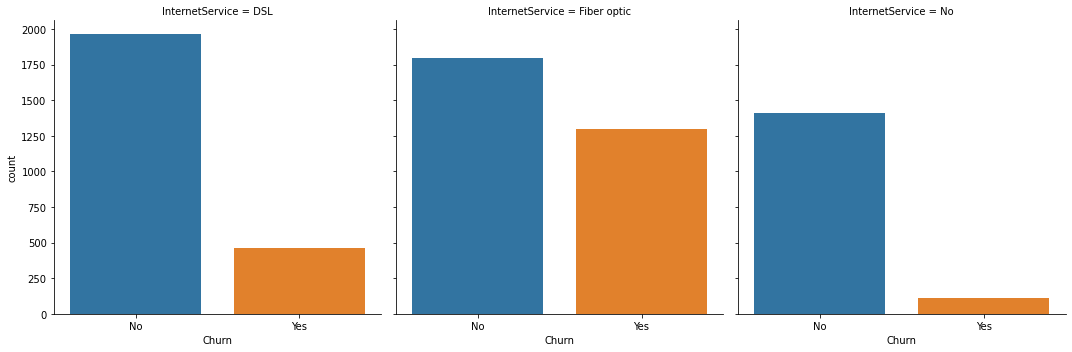

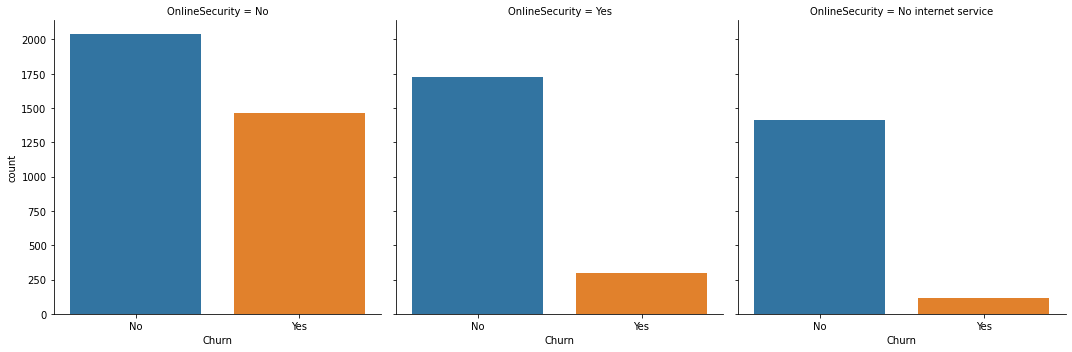

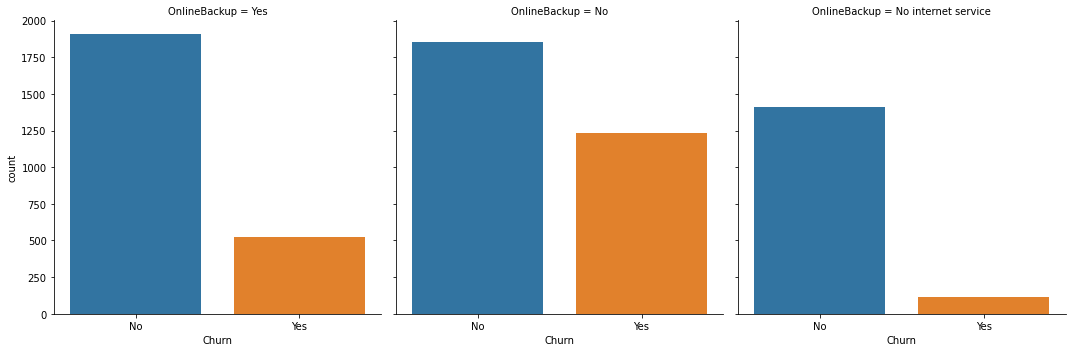

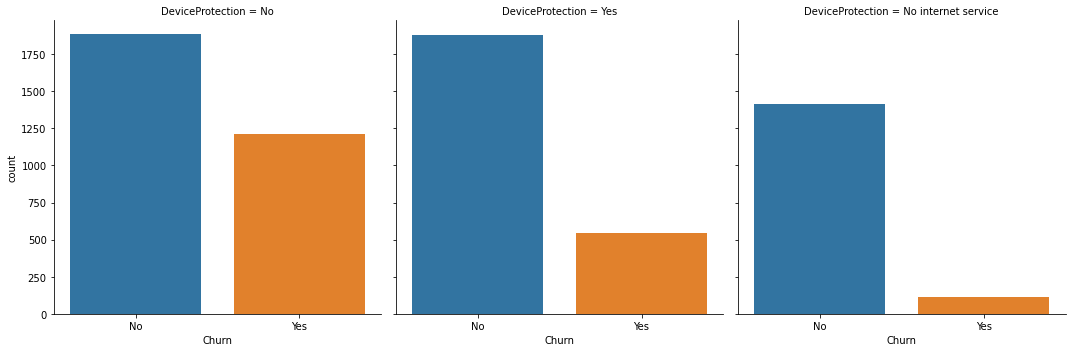

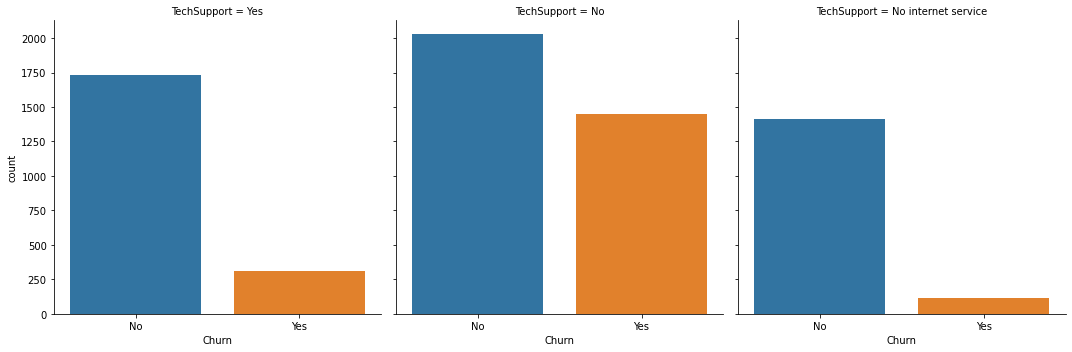

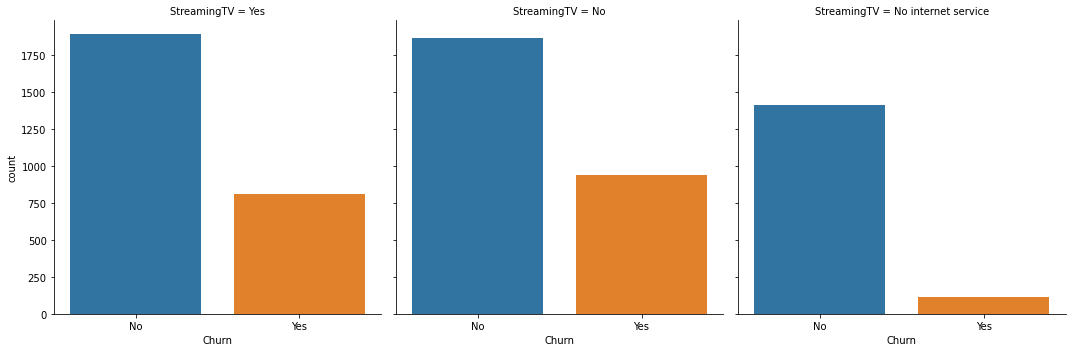

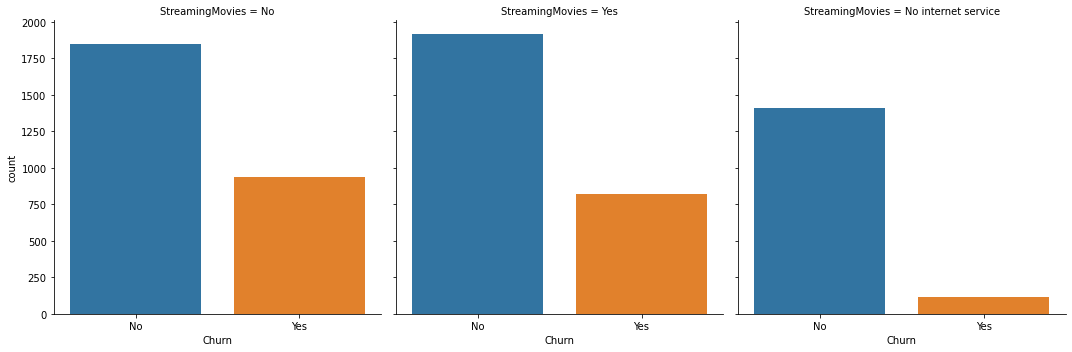

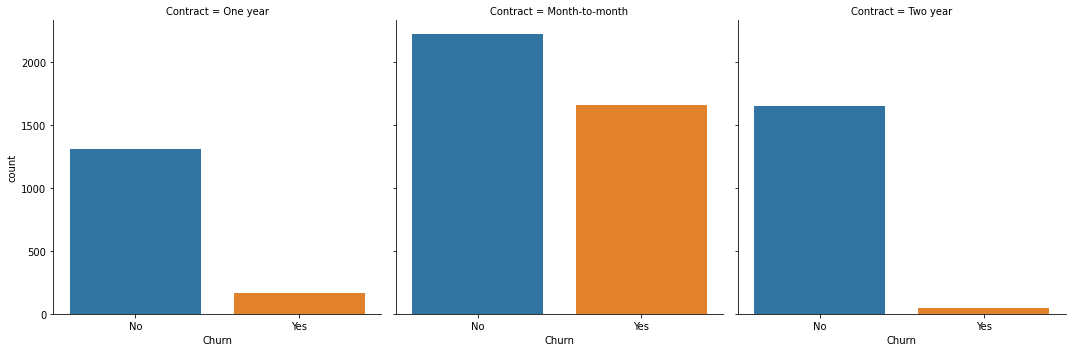

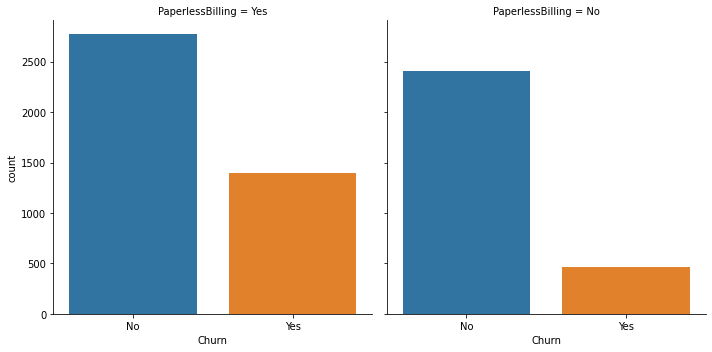

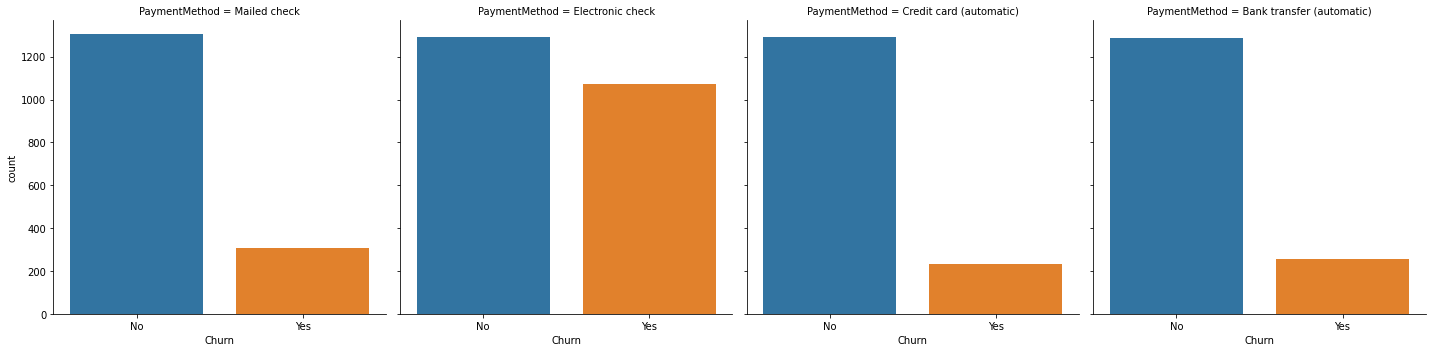

In [ ]:
dfdrop=df.drop(columns=['CustomerID','Tenure','ChargesDaily','ChargesMonthly','ChargesTotal'])

for col in dfdrop:
  p = sns.catplot(data=dfdrop, x='Churn', col=col, kind='count')


Let's also check outliers on quantitative variables

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7b6702d7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7b670360d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7b67029090>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7b6703d490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7b67041d90>],
 'means': []}

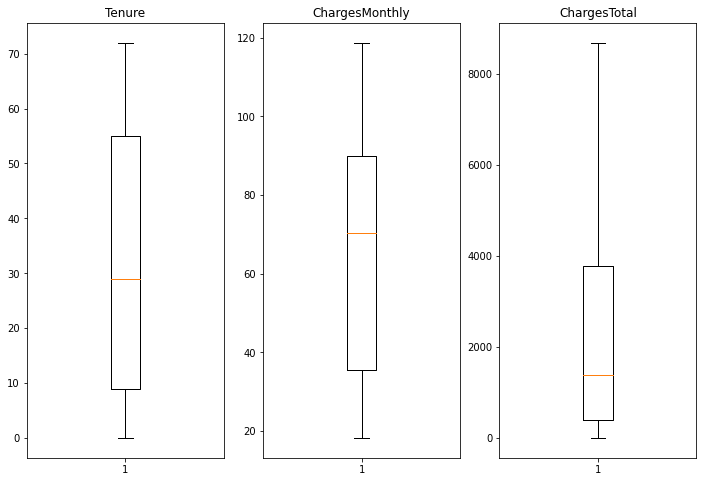

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(12,8))

axs[0].set_title('Tenure')
axs[0].boxplot(df.Tenure)

axs[1].set_title('ChargesMonthly')
axs[1].boxplot(df.ChargesMonthly)

axs[2].set_title('ChargesTotal')
axs[2].boxplot(df.ChargesTotal)

Follow insights obtained from this analysis:
the profile of customers with highers churners are:
1. New clients, that's might happens due free trial period;
2. No senior citizens and with no depents;
3. Customers with fiber optic services
4. Customers without: online security, online backup, device protection, tech support services;
5. Month to month and eletronic check as payment method. In this case, if we created a contract term or some benefit for renewed contract customers this might change.



## 5. Machine Learning Models

At this point we know what are the insights obtained from this data analysis. Now Alura Voz needs us to create a machine learning model to predict client churn.
For that purpose, let's prepare our dataset to train and test ML methods.

In [ ]:
pd.set_option('.max_columns', 22)
df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


### Enconding Dataset

To encoding our dataset we'll use two approaches: LabelEnconder and One-hot Enconding. Label enconding will be use on column "Contract" because it's a ordinal variable. The others columns due the number of categorical features, one-hot encoding can be effectively applied.
Noticed that CustomerID will be deleted for being a primary-key and not being useful for our model 

#### Label Enconding

In [ ]:
df.drop(columns='CustomerID', inplace=True)

In [ ]:
cols = df.dtypes.reset_index().rename(columns={'index':'column',0:'type'})
cont_col= cols[cols.column == 'Contract']
cont_col

,column,type
15,Contract,object


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cont_col.column:
    df[str(i) + '_encoded'] = le.fit_transform(df[i])

In [ ]:
df = df.drop(columns='Contract', axis=1)
df.head()

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal,Contract_encoded
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Yes,Mailed check,2.19,65.6,593.30,1
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,No,Mailed check,2.00,59.9,542.40,0
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Yes,Electronic check,2.46,73.9,280.85,0
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Electronic check,3.27,98.0,1237.85,0
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Yes,Mailed check,2.80,83.9,267.40,0


#### One-hot Encoding

In [ ]:
to_replace_dic = {'Yes' : 1,
              'No' : 0}
df_modify = df[['Partner','Dependents','PhoneService','PaperlessBilling','Churn']].replace(to_replace_dic)
df_modify.head()

,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,1,1,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,1,0,1,1,1
4,1,0,1,1,1


In [ ]:
dummies_df = pd.get_dummies(df.drop(['Partner','Dependents','PhoneService','PaperlessBilling','Churn'], axis=1))
dummies_df.head()

,Tenure,ChargesDaily,ChargesMonthly,ChargesTotal,Contract_encoded,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,MultipleLines_No,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,9,2.19,65.6,593.30,1,1,0,1,0,1,0,...,1,0,0,1,1,0,0,0,0,0,1
1,9,2.00,59.9,542.40,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0,1
2,4,2.46,73.9,280.85,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1,0
3,13,3.27,98.0,1237.85,0,0,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1,0
4,3,2.80,83.9,267.40,0,1,0,0,1,1,0,...,1,0,0,1,1,0,0,0,0,0,1


In [ ]:
df_final = pd.concat([df_modify,dummies_df], axis=1)
df_final.head()

,Partner,Dependents,PhoneService,PaperlessBilling,Churn,Tenure,ChargesDaily,ChargesMonthly,ChargesTotal,Contract_encoded,Gender_Female,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,1,1,0,9,2.19,65.6,593.30,1,1,...,1,0,0,1,1,0,0,0,0,0,1
1,0,0,1,0,0,9,2.00,59.9,542.40,0,0,...,0,1,0,0,0,0,1,0,0,0,1
2,0,0,1,1,1,4,2.46,73.9,280.85,0,0,...,0,1,0,0,1,0,0,0,0,1,0
3,1,0,1,1,1,13,3.27,98.0,1237.85,0,0,...,0,0,0,1,0,0,1,0,0,1,0
4,1,0,1,1,1,3,2.80,83.9,267.40,0,1,...,1,0,0,1,1,0,0,0,0,0,1


For balance Churn we'll use **oversampling** technique, which is randomly duplicate the minority class until equalize, that's avoid Bias on majority class

In [ ]:
df_final['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
x = df_final.drop('Churn', axis=1)
y = df_final['Churn']
from imblearn.over_sampling import SMOTE
SEED=42
smt = SMOTE(random_state=SEED)  
x, y = smt.fit_resample(x, y)
df_ready = pd.concat([x,y], axis=1)
df_ready.head()

,Partner,Dependents,PhoneService,PaperlessBilling,Tenure,ChargesDaily,ChargesMonthly,ChargesTotal,Contract_encoded,Gender_Female,Gender_Male,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,1,1,1,9,2.19,65.6,593.30,1,1,0,...,0,0,1,1,0,0,0,0,0,1,0
1,0,0,1,0,9,2.00,59.9,542.40,0,0,1,...,1,0,0,0,0,1,0,0,0,1,0
2,0,0,1,1,4,2.46,73.9,280.85,0,0,1,...,1,0,0,1,0,0,0,0,1,0,1
3,1,0,1,1,13,3.27,98.0,1237.85,0,0,1,...,0,0,1,0,0,1,0,0,1,0,1
4,1,0,1,1,3,2.80,83.9,267.40,0,1,0,...,0,0,1,1,0,0,0,0,0,1,1


In [ ]:
df_ready['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Data is encoded and balanced, but it's important to mentioned one-hot encoding leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features. That's a problem when it comes to use Linear and Logistic Regressions models.

One technique to identify Multicollinearity is Variance Inflation Factor (VIF)

In [ ]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Partner                                  10348 non-null  int64  
 1   Dependents                               10348 non-null  int64  
 2   PhoneService                             10348 non-null  int64  
 3   PaperlessBilling                         10348 non-null  int64  
 4   Tenure                                   10348 non-null  int64  
 5   ChargesDaily                             10348 non-null  float64
 6   ChargesMonthly                           10348 non-null  float64
 7   ChargesTotal                             10348 non-null  float64
 8   Contract_encoded                         10348 non-null  int64  
 9   Gender_Female                            10348 non-null  uint8  
 10  Gender_Male                              10348

Our data is already numeric, so don't need to be modified, let's import library moving on with VIF calculation

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
x = df_ready.drop(columns = 'Churn')
  
# VIF dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = x.columns
  
# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_df)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                    feature           VIF
0                                   Partner  2.493108e+00
1                                Dependents  1.846928e+00
2                              PhoneService  8.476855e+01
3                          PaperlessBilling  2.932044e+00
4                                    Tenure  2.046124e+01
5                              ChargesDaily  7.728862e+05
6                            ChargesMonthly  7.732629e+05
7                              ChargesTotal  2.081789e+01
8                          Contract_encoded  3.722170e+00
9                             Gender_Female  5.521001e+00
10                              Gender_Male  5.710724e+00
11                         SeniorCitizen_No  1.025981e+01
12                        SeniorCitizen_Yes  2.728717e+00
13                         MultipleLines_No  8.310799e+00
14           MultipleLines_No phone service  5.443357e+00
15                        MultipleLines_Yes  6.866280e+00
16            

According to The Cambridge Dictionary of Statistics, VIF factors () can be understood by the following ways:

**VIF = 1**, Very Less Multicollinearity (or correlated);

**VIF < 5**, Moderate Multicollinearity;

**VIF > 5**, Highly Multicollinearity;

To solve this issue, let's drop a few dummy columns so we can reduce VIF

In [ ]:
df_original = df_ready.copy()

In [ ]:
df_drop = df_ready.drop(columns=['MultipleLines_No','TechSupport_No','OnlineBackup_No'])

In [ ]:
# the independent variables set
x = df_drop.drop(columns = 'Churn')
  
# VIF dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = x.columns
  
# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_df)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                    feature           VIF
0                                   Partner  2.492217e+00
1                                Dependents  1.846767e+00
2                              PhoneService  7.461404e+01
3                          PaperlessBilling  2.928130e+00
4                                    Tenure  2.039408e+01
5                              ChargesDaily  7.727397e+05
6                            ChargesMonthly  7.731405e+05
7                              ChargesTotal  2.064768e+01
8                          Contract_encoded  3.719525e+00
9                             Gender_Female  5.404666e+00
10                              Gender_Male  5.593695e+00
11                         SeniorCitizen_No  1.003586e+01
12                        SeniorCitizen_Yes  2.678642e+00
13           MultipleLines_No phone service  5.259738e+00
14                        MultipleLines_Yes  2.446505e+00
15                      InternetService_DSL  1.226423e+01
16            

In [ ]:
df = df_drop.copy()
df.head()

,Partner,Dependents,PhoneService,PaperlessBilling,Tenure,ChargesDaily,ChargesMonthly,ChargesTotal,Contract_encoded,Gender_Female,Gender_Male,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,1,1,1,9,2.19,65.6,593.30,1,1,0,...,0,0,1,1,0,0,0,0,0,1,0
1,0,0,1,0,9,2.00,59.9,542.40,0,0,1,...,1,0,0,0,0,1,0,0,0,1,0
2,0,0,1,1,4,2.46,73.9,280.85,0,0,1,...,1,0,0,1,0,0,0,0,1,0,1
3,1,0,1,1,13,3.27,98.0,1237.85,0,0,1,...,0,0,1,0,0,1,0,0,1,0,1
4,1,0,1,1,3,2.80,83.9,267.40,0,1,0,...,0,0,1,1,0,0,0,0,0,1,1


From exploratory data analysis, let's remove a few information that won't impact on Churn rate models. Some were already remove but just to be clear:  ChargesDaily, ChargesMonthly, ChargesTotal. After remove, we'll adjust scaling range of Tenure information

In [ ]:
df.drop(columns=['ChargesDaily','ChargesMonthly','ChargesTotal'],  inplace=True)

In [ ]:
tenure_scaling = ['Tenure']

for column in tenure_scaling:

    min = df[column].min()
    max = df[column].max()

    df[column] = (df[column] - min)/(max-min)

df.head()

,Partner,Dependents,PhoneService,PaperlessBilling,Tenure,Contract_encoded,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,MultipleLines_No phone service,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,1,1,1,0.125000,1,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1,0
1,0,0,1,0,0.125000,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,1,0
2,0,0,1,1,0.055556,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0,1
3,1,0,1,1,0.180556,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0,1
4,1,0,1,1,0.041667,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1,1


,Partner,Dependents,PhoneService,PaperlessBilling,Tenure,Contract_encoded,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,MultipleLines_No phone service,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,1,1,1,0.125000,1,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1,0
1,0,0,1,0,0.125000,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,1,0
2,0,0,1,1,0.055556,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0,1
3,1,0,1,1,0.180556,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0,1
4,1,0,1,1,0.041667,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1,1


,Partner,Dependents,PhoneService,PaperlessBilling,Tenure,Contract_encoded,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,MultipleLines_No phone service,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,1,1,1,0.125000,1,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1,0
1,0,0,1,0,0.125000,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,1,0
2,0,0,1,1,0.055556,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0,1
3,1,0,1,1,0.180556,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0,1
4,1,0,1,1,0.041667,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1,1


## Testing Machine Learning Models

### K-Nearest Neightbors (KNN) Model

Dividing  inputs and outputs and standardize the scale of our dataset

In [ ]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
norm = StandardScaler()
x_normalize = norm.fit_transform(x)
x_normalize

array([[ 1.29139377,  1.89983002,  0.33693666, ..., -0.42307274,
        -0.73601381,  2.13133331],
       [-0.77435715, -0.52636288,  0.33693666, ..., -0.42307274,
        -0.73601381,  2.13133331],
       [-0.77435715, -0.52636288,  0.33693666, ..., -0.42307274,
         1.35867016, -0.46918987],
       ...,
       [-0.77435715, -0.52636288,  0.33693666, ..., -0.42307274,
        -0.73601381, -0.46918987],
       [-0.77435715, -0.52636288,  0.33693666, ..., -0.42307274,
         1.35867016, -0.46918987],
       [-0.77435715, -0.52636288,  0.33693666, ..., -0.42307274,
         1.35867016, -0.46918987]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

Implement, train and test KNN model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_normalize, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(metric='euclidean')

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
predict_knn = knn.predict(x_test)
predict_knn

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
K-Nearest Neightbors (KNN) Model

###Bernoulli Naive Bayes Model

In [ ]:
np.mean(x_train)

-0.001706849767715143

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bnb = BernoulliNB(binarize=-0.0017) # by doing this, everything before and after -0.0017 will be binarize to 0 and 1

In [ ]:
bnb.fit(x_train, y_train)

BernoulliNB(binarize=-0.0017)

In [ ]:
predict_bnb = bnb.predict(x_test)

In [ ]:
predict_bnb

array([1, 0, 1, ..., 1, 0, 0])

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
dtc.feature_importances_

array([0.01402036, 0.01086372, 0.        , 0.01861792, 0.09853785,
       0.06523803, 0.08613153, 0.12502342, 0.01019709, 0.01720863,
       0.01051407, 0.00772638, 0.01776027, 0.00797414, 0.01900959,
       0.00529438, 0.02780374, 0.        , 0.01337269, 0.        ,
       0.01445243, 0.00477951, 0.        , 0.01038531, 0.0069172 ,
       0.        , 0.00401126, 0.00801974, 0.01168583, 0.01190184,
       0.00306423, 0.        , 0.00294134, 0.00734852, 0.00027689,
       0.00908883, 0.02701052, 0.11222512, 0.14853429, 0.01522142,
       0.01202259, 0.01552103, 0.01929825])

In [ ]:
predict_DecTree = dtc.predict(x_test)

In [ ]:
predict_DecTree

array([1, 0, 1, ..., 1, 0, 0])

###Evaluate KNN, Naive Bayers and Decision Tree Models

There are many metrics to evaluate each models, but for this case we choose Precision and another one under development

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k.means++', random_state=42)
  kmeans.fit(categ_cols)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()